# Iterative Methods for Solving Linear Systems

Iterative techniques are rarely used for solving linear systems of small dimension because the computation time required for convergence usually exceeds that required for direct methods such as Gaussian elimination.  However, for very large systems, especially sparse systems (systems with a high percentage of 0 entries in the matrix), these iterative techniques can be very efficient in terms of computational run times and memory usage.

An iterative technique starts to solve the matrix equation $\mathbf{A}\vec{x} = \vec{b}$ starts with an initial approximation $\vec{x^0}$ and generates a sequence of vectors $\{\vec{x}^1,\vec{x}^2,\ldots, \vec{x}^N\}$ that converges to $\vec{x}$ as $N\rightarrow\infty$. These techniques involve a process that converts the system $\mathbf{A}\vec{x}=\vec{b}$ to an equivalent system of the form $\vec{x}=\mathbf{T}\vec{x}+\vec{c}$. The process then follows, for an initial guess $\vec{x}^0$

Starting with an initial guess $\vec{x}_0$, we convert

$$
\mathbf{A}\vec{x} = \vec{b} \qquad \to \qquad \vec{x} = \mathbf{T}\vec{x} + \vec{c}
$$

\begin{align}
\vec{x}^1 &= \mathbf{T}\vec{x}^0 + \vec{c}\\
\vec{x}^2 &= \mathbf{T}\vec{x}^1 + \vec{c}\\
&\phantom{=}\vdots\\
\vec{x}^N &= \mathbf{T}\vec{x}^{N-1} + \vec{c}\\
\end{align}

In principle the sequence above only depends on the matrix-vector multiplication and vector-vector addition operations.

We will stop the iteration when some convergence criterion has been reached. A popular convergence criterion uses the $L_{\infty}$norm. Recall:

In [1]:
import numpy as np

# For a vector
vector = np.array([-6, 4, 2])
l_infinity_norm_vector = np.linalg.norm(vector, ord=1)
print(f"L-infinity norm of the vector: {l_infinity_norm_vector}")

L-infinity norm of the vector: 12.0


## An example using an iterative method

Consider the system:

$$
\begin{matrix} E_1: & 10x_1 & -x_2 & +2x_3 & & =& 6\\E_2: & -x_1 & +11x_2 & -x_3 & +3x_4 & =&25\\E_3: & 2x_1 & -x_2 & + 10x_3 & -x_4 & =&-11\\E_4: &  & -3x_2 & -x_3 & +8x_4 & = &15\end{matrix}
$$

Let us solve each equation, $E_j$, for the variable $x_j$.

$$
\begin{matrix} E_1: & x_1 =&  &\frac{1}{10}x_2& - \frac{1}{5}x_3 &  & +\frac{3}{5}\\
E_2: & x_2 = &\frac{1}{11}x_1 & &\frac{1}{11}x_3 & -\frac{3}{11}x_4 & +\frac{25}{11}\\
E_3: & x_3 = &-\frac{1}{5}x_1 & +\frac{1}{10}x_2 & & +\frac{1}{10}x_4 & -\frac{11}{10}\\
E_4: & x_4 = & & -\frac{3}{8}x_2 & + \frac{1}{8}x_3 & & +\frac{15}{8} \end{matrix}
$$

using the notation introduced previously we have

$$
\vec{x}^1 = \begin{bmatrix} 0 & \frac{1}{10} & -\frac{1}{5} & 0\\
\frac{1}{11} & 0 & \frac{1}{11} & -\frac{3}{11}\\
-\frac{1}{5} & \frac{1}{10} & 0 & \frac{1}{10}\\
0 & -\frac{3}{8} & \frac{1}{8} & 0 \end{bmatrix}\vec{x}_0 + \begin{bmatrix}\frac{3}{5}\\\frac{25}{11}\\-\frac{11}{10}\\\frac{15}{8}\end{bmatrix},$$

for

$$\vec{x}^0 = \begin{bmatrix}0\\0\\0\\0\end{bmatrix}, \qquad \vec{x}^1 = \begin{bmatrix}0.6000\\2.2727\\-1.1000\\1.8750\end{bmatrix}$$

we repeat this process until the desired convergence has been reached. This technique is called the Jacobi iterative method.

### Psuedocode for Jacobi iteration

For the matrix equation $\mathbf{A} \vec{x} = \vec{b}$ with an initial guess $\vec{x}^0$.

\begin{equation}
A = \begin{bmatrix}a_{11}&a_{12}&...&a_{1n}\\a_{21}&\ddots& &\vdots\\\vdots& &\ddots&\vdots\\a_{n1}&...&...&a_{nn}\end{bmatrix}, \quad \vec{b} = \begin{bmatrix} b_{1} \\ b_{2} \\ \vdots \\ b_{n}\end{bmatrix}, \quad \vec{x}^{0} = \begin{bmatrix} x^0_{1} \\ x^0_{2} \\ \vdots \\ x^0_{n}\end{bmatrix},
\end{equation}


While $\frac{\Vert \vec{x}_k - \vec{x}_{k-1} \Vert_{L_\infty}}{\Vert \vec{x} \Vert_{L_\infty}}>$ tolerance

$\phantom{--}$ For $i = 1, 2, \ldots, n$

$\phantom{----} x^k_i = \frac{1}{a_{ii}} \left.\left( -\sum_{\substack{j=1 \\ i \ne j}}^n a_{ij} x^k_j  + b_i\right)  \right.$

### Jacobi iteration

In [2]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
import numpy as np

def jacobi(A, b, x0, tol=1e-6, max_iterations=1000):
    """
    Solves a system of linear equations Ax = b using the Jacobi method.

    Args:
        A (numpy.ndarray): The coefficient matrix.
        b (numpy.ndarray): The constant vector.
        x0 (numpy.ndarray): The initial guess for the solution vector.
        tol (float): The tolerance for convergence.
        max_iterations (int): The maximum number of iterations.

    Returns:
        numpy.ndarray: The approximate solution vector.
    """
    n = len(b)
    x = x0.copy()  # Current approximation
    x_new = np.zeros_like(x) # New approximation for the next iteration

    for k in range(max_iterations):
        for i in range(n):
            sum_val = 0
            for j in range(n):
                if i != j:
                    sum_val += A[i, j] * x[j]
            x_new[i] = (b[i] - sum_val) / A[i, i]

        if (np.linalg.norm(x_new, ord=np.inf) == 0): break
            #raise AssertionError("error")
        # Check for convergence
        if np.linalg.norm(x_new - x, ord=np.inf)/np.linalg.norm(x_new, ord=np.inf) < tol:
            print(f"Converged after {k+1} iterations.")
            return x_new, k+1

        x = x_new.copy() # Update for the next iteration

    print(f"Jacobi method did not converge within {max_iterations} iterations.")
    return x, max_iterations

# Example Usage:
# Define the system
A = np.array([[4, -1, 0],
              [-1, 4, -1],
              [0, -1, 4]], dtype=float)

b = np.array([10, 20, 10], dtype=float)

# Initial guess (often a vector of zeros)
x0 = np.zeros_like(b, dtype=float)

# Solve using Jacobi method
solution = jacobi(A, b, x0, tol=1e-12)

print("\nApproximate solution:")
print(solution)

# Verify with numpy's linalg.solve
exact_solution = np.linalg.solve(A, b)
print("\nExact solution (using numpy.linalg.solve):")
print(exact_solution)

Converged after 28 iterations.

Approximate solution:
(array([4.28571429, 7.14285714, 4.28571429]), 28)

Exact solution (using numpy.linalg.solve):
[4.28571429 7.14285714 4.28571429]


### Observations on the Jacobi iterative method

Let's consider a matrix $\mathbf{A}$, in which we split into three matrices, $\mathbf{D}$, $\mathbf{U}$, $\mathbf{L}$, where these matrices are diagonal, upper triangular, and lower triangular respectively.

$$
A = \begin{bmatrix}a_{11}&a_{12}&\ldots&a_{1n}\\a_{21}&\ddots& &\vdots\\\vdots& &\ddots&\vdots\\a_{n1}&\ldots&\ldots&a_{nn}\end{bmatrix}, D = \begin{bmatrix}a_{11}&0&\ldots&0\\0&\ddots& &\vdots\\\vdots& &\ddots&\vdots\\0&\ldots&\ldots&a_{nn}\end{bmatrix}, \\
L = \begin{bmatrix}0&0&\ldots&0\\-a_{21}&\ddots& &\vdots\\\vdots& &\ddots&\vdots\\-a_{n1}&\ldots&-a_{n(n-1)}&0\end{bmatrix}, U = \begin{bmatrix}0&-a_{12}&\ldots&-a_{1n}\\\vdots&\ddots& &\vdots\\\vdots& &\ddots&-a_{(n-1)n}\\0&\ldots&\ldots&0\end{bmatrix}
$$

If we let $\mathbf{A = D-L-U}$, then the matrix equation $\mathbf{A}\vec{x} = \vec{b}$ becomes

\begin{equation}
\left(\mathbf{D-L-U}\right)\vec{x} = \vec{b} \quad \mathrm{or} \quad \mathbf{D}\vec{x} = \left(\mathbf{L+U}\right)\vec{x}+\vec{b}
\end{equation}

if $\mathbf{D}^{-1}$ exists, that implies $a_{jj} \neq 0$, then

$$\vec{x} = \mathbf{D}^{-1}\left(\mathbf{L+U}\right)\vec{x}+\mathbf{D}^{-1}\vec{b}$$

The results in the matrix form of the Jacobi iteration method

\begin{equation}
\vec{x}^k = \mathbf{D}^{-1}\left(\mathbf{L+U}\right)\vec{x}^{k-1}+\mathbf{D}^{-1}\vec{b}
\end{equation}

We can see that one requirement for the Jacobi iteration to work is for $a_{ii} \neq 0$. This may involve row exchanges before iterating for some linear systems. Strict diagonal dominance gives conditions for the convergence of the Jacobi method:


An $n\times n$ matrix $A$ is said to be **strictly diagonally dominant** if for each $i$, $1\le i\le n$, $$\sum_{1 \leq j \leq n, j \neq i}|a_{i,j}|  < |a_{i,i}|,$$
i.e., the absolute value of each diagonal elment of $A$ is strictly greater than the absolute sum of the rest of the elemtents in the same row.

## Gauss-Seidel iteration: An improvement to the Jacobi iterative method

During the Jacobi iteration we always use the components of $\vec{x}^{k-1}$ to compute $\vec{x}^{k}$ but for $i > 1, {x}^{k}_1, \ldots, {x}^{k}_{i-1}$ are already computed and are most likely the best approximations of the real solution.  Therefore, we can calculate ${x}^{k}_i$ using the most recently calculated values when available. This technique is called *Gauss-Seidel iteration*. The pseudocode is as follows

### Pseudocode for Gauss-Seidel iteration

For the matrix equation $\mathbf{A} \vec{x} = \vec{b}$ with an initial guess $\vec{x}^0$.

$$
A=\begin{bmatrix}a_{11}&a_{12}&\ldots&a_{1n}\\a_{21}&\ddots& &\vdots\\\vdots& &\ddots&\vdots\\a_{n1}&\ldots&\ldots&a_{nn}\end{bmatrix}, \bar{b} = \begin{bmatrix}b_1\\b_1\\\vdots\\b_n\end{bmatrix}, \bar{x}_0 = \begin{bmatrix}x^{0}_1\\x^{0}_2\\\vdots\\x^{0}_n\end{bmatrix}
$$



While $\frac{\Vert\vec{x}^{k}-\vec{x}^{k-1}\Vert_{L_\infty}}{\Vert\bar{x}^{k}\Vert_{L_\infty}} >$ tolerance

$\phantom{--}$ For $i = 1, 2, ..., n$

$\phantom{----} x^{k}_i = \left.\left(-\sum_{j=1}^{i-1}a_{ij}x^{k}_j-\sum_{j=i+1}^{n}a_{ij}x^{k-1}_j+b_i\right) \middle/ {a_{ii}}\right.$

### Gauss-Seidel iteration

In [4]:
def gauss_seidel(A, b, x0, tol=1e-6, max_iter=100):
    """
    Solves a system of linear equations Ax = b using the Gauss-Seidel method.

    Args:
        A (numpy.ndarray): The coefficient matrix.
        b (numpy.ndarray): The constant vector.
        x0 (numpy.ndarray): The initial guess for the solution vector.
        tol (float): The tolerance for convergence.
        max_iter (int): The maximum number of iterations.

    Returns:
        numpy.ndarray: The approximate solution vector.
        int: The number of iterations taken.
    """
    n = len(b)
    x = x0.copy()  # Make a copy to avoid modifying the original x0

    for iteration in range(max_iter):
        x_prev = x.copy()  # Store the previous iteration's values

        for i in range(n):
            sum_val = 0
            for j in range(n):
                if i != j:
                    sum_val += A[i, j] * x[j]
            x[i] = (b[i] - sum_val) / A[i, i]

        # Check for convergence
        if np.linalg.norm(x - x_prev)/np.linalg.norm(x) < tol:
            print(f"Converged in {iteration + 1} iterations.")
            return x, iteration + 1

    print(f"Did not converge within {max_iter} iterations.")
    return x, max_iter

# Example usage:
# Define the system Ax = b
A = np.array([[4, 1, 2],
              [3, 5, 1],
              [1, 1, 3]])

b = np.array([4, 7, 3])

# Initial guess
x0 = np.array([0.0, 0.0, 0.0])

# Solve using Gauss-Seidel
solution, iterations = gauss_seidel(A, b, x0, tol=1e-12)

print("Approximate solution:", solution)
print("Iterations:", iterations)

Converged in 19 iterations.
Approximate solution: [0.5 1.  0.5]
Iterations: 19


### Observations on the Gauss-Seidel iterative method

Let's consider a matrix $\mathbf{A}$, in which we split into three matrices, $\mathbf{D, U, L}$, where these matrices are diagonal, upper triangular, and lower triangular respectively.

$$
A = \begin{bmatrix}a_{11}&a_{12}&\ldots&a_{1n}\\a_{21}&\ddots& &\vdots\\\vdots& &\ddots&\vdots\\a_{n1}&\ldots&\ldots&a_{nn}\end{bmatrix}, D = \begin{bmatrix}a_{11}&0&\ldots&0\\0&\ddots& &\vdots\\\vdots& &\ddots&\vdots\\0&\ldots&\ldots&a_{nn}\end{bmatrix}, \\ L = \begin{bmatrix}0&0&\ldots&0\\-a_{21}&\ddots& &\vdots\\\vdots& &\ddots&\vdots\\-a_{n1}&\ldots&-a_{n(n-1)}&0\end{bmatrix}, U = \begin{bmatrix}0&-a_{12}&\ldots&-a_{1n}\\\vdots&\ddots& &\vdots\\\vdots& &\ddots&-a_{(n-1)n}\\0&\ldots&\ldots&0\end{bmatrix}
$$

We will leave, as an exercise for the student, the derivation, but the matrix equation for the Gauss-Seidel iteration method is as follows:

$$\vec{x}^k = \left(\mathbf{D-L}\right)^{-1}\mathbf{U}\vec{x}^{k-1}+\left(\mathbf{D-L}\right)^{-1}\vec{b}$$

In order for the lower triangular matrix $\mathbf{D-L}$ to be invertible it is necessary and sufficient for $a_{ii}\neq 0$. As before, this may involve row exchanges before iterating for some linear systems.

### **Homework**:

In this assignment, we show the convergence of Jacobi and Gauss-Seidel iterations for solving a linear system. We will consider the $L_2$ norm of error versus the iteration steps and show how the $L_2$ norm decreases, if at all, as the number of iterations increase. We use both methods to obtain the solution of

$$ {\bf Ax}={\bf y}$$

**Assignment**:
1. Use `jacopbi` and `gauss_seidel` functions to solve the system of
equations in HW2 with $n=80$.
2. Confirm that your solution is correct, up to the specified tolerance,
by comparing the results with the results of solving the linear system using the
Gaussian elimination. Explain why you do not need to worry about pivoting.
3. One a same plot, plot $|x^{k+1}-x^{k}|_2$ for both methods, where
$k$ is the iteration step and $|.|_2$ is the $L_2$ norm. Describe
your observation as how the norm decreases in each method.
4. Plot the computational time of each method for $n=10,100,1000,1000$,
while keeping ``tol`` fixed, and describe the computational complexity of
the methods, by plotting the computational time as a function of $n$.

# Pablo Leyva Homework 3 Submission


In [5]:
# Build System from HW2
def build_system(n, f=lambda x: np.zeros_like(x), alpha=0.0, beta=0.0, L=0.0, R=1.0):
    """
    Builds the tridiagonal matrix A and RHS vector b for -y'' = f(x),
    with Dirichlet BCs y(L)=alpha, y(R)=beta.
    """
    h = (R - L) / n
    x = np.linspace(L, R, n + 1)

    N = n - 1
    A = np.zeros((N, N))
    b = f(x[1:-1])

    # Fill tridiagonal entries
    diag = 2.0 * np.ones(N)
    off = -1.0 * np.ones(N - 1)
    A += np.diag(diag) + np.diag(off, 1) + np.diag(off, -1)
    A /= h**2

    # Dirichlet BC adjustments
    b[0]  += alpha / h**2
    b[-1] += beta  / h**2

    return x, A, b, h

In [6]:
def jacobi(A, b, x0=None, tol=1e-8, maxit=10000):
    n = len(b)
    if x0 is None: x0 = np.zeros(n)
    D = np.diag(np.diag(A))
    R = A - D
    Dinv = np.diag(1 / np.diag(D))
    x = x0.copy()
    errs = []

    for k in range(maxit):
        x_new = Dinv @ (b - R @ x)
        err = np.linalg.norm(x_new - x)
        errs.append(err)
        if err / np.linalg.norm(x_new) < tol:
            return x_new, k+1, np.array(errs)
        x = x_new

    return x, maxit, np.array(errs)


def gauss_seidel(A, b, x0=None, tol=1e-8, maxit=10000):
    n = len(b)
    if x0 is None: x0 = np.zeros(n)
    x = x0.copy()
    errs = []

    for k in range(maxit):
        x_old = x.copy()
        for i in range(n):
            s1 = A[i,:i] @ x[:i]
            s2 = A[i,i+1:] @ x_old[i+1:]
            x[i] = (b[i] - s1 - s2)/A[i,i]
        err = np.linalg.norm(x - x_old)
        errs.append(err)
        if err / np.linalg.norm(x) < tol:
            return x, k+1, np.array(errs)

    return x, maxit, np.array(errs)



Jacobi iterations: 10000
Gauss-Seidel iterations: 7746
Jacobi residual error: 0.003600310121915028
Gauss-Seidel residual error: 5.2182424710939285e-05


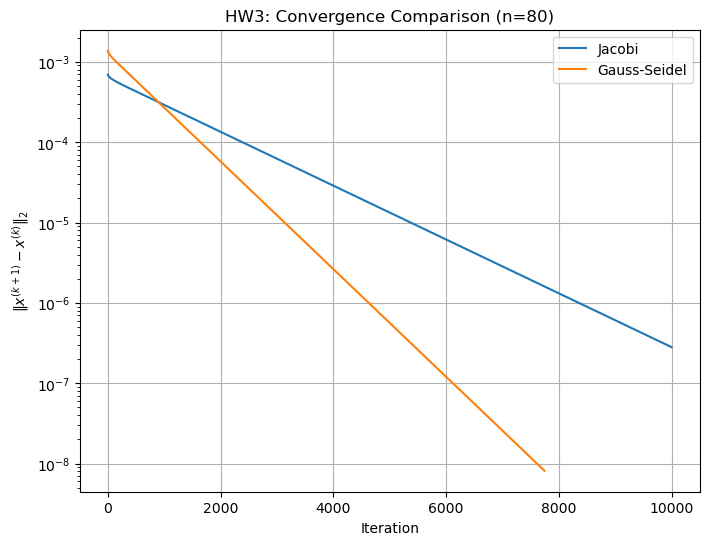

In [7]:
n = 80
f = lambda x: np.ones_like(x)  # -y'' = 1
x, A, b, h = build_system(n, f=f)
x0 = np.zeros_like(b)

# Direct solution
x_direct_inner = np.linalg.solve(A, b)

# Jacobi
x_jacobi, it_jacobi, errs_jacobi = jacobi(A, b, x0)
# Gauss-Seidel
x_gs, it_gs, errs_gs = gauss_seidel(A, b, x0)

print(f"Jacobi iterations: {it_jacobi}")
print(f"Gauss-Seidel iterations: {it_gs}")
print(f"Jacobi residual error: {np.linalg.norm(A@x_jacobi - b)}")
print(f"Gauss-Seidel residual error: {np.linalg.norm(A@x_gs - b)}")

# Error plot
plt.figure(figsize=(8,6))
plt.semilogy(errs_jacobi, label='Jacobi')
plt.semilogy(errs_gs, label='Gauss-Seidel')
plt.title('HW3: Convergence Comparison (n=80)')
plt.xlabel('Iteration')
plt.ylabel(r'$\|x^{(k+1)} - x^{(k)}\|_2$')
plt.legend()
plt.grid(True)
plt.show()


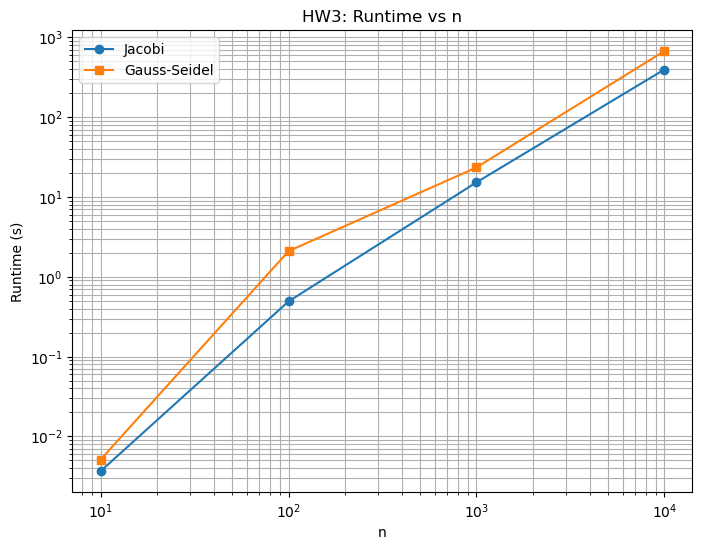

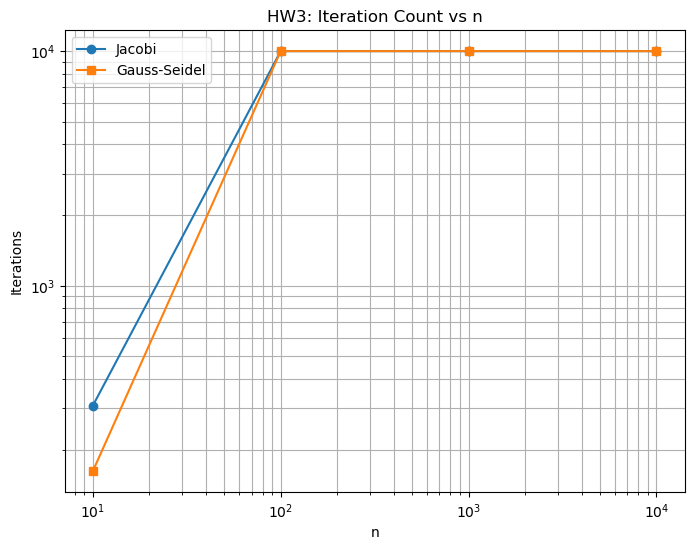

In [8]:

ns = [10, 100, 1000, 10000]
tol = 1e-8
timings = {'jacobi': [], 'gs': []}
iters = {'jacobi': [], 'gs': []}

for n in ns:
    x, A, b, h = build_system(n, f=f)
    x0 = np.zeros_like(b)
    
    t0 = time.perf_counter()
    _, it_jacobi, _ = jacobi(A, b, x0, tol)
    t1 = time.perf_counter() - t0

    t0 = time.perf_counter()
    _, it_gs, _ = gauss_seidel(A, b, x0, tol)
    t2 = time.perf_counter() - t0

    timings['jacobi'].append(t1)
    timings['gs'].append(t2)
    iters['jacobi'].append(it_jacobi)
    iters['gs'].append(it_gs)

# Timing plot
plt.figure(figsize=(8,6))
plt.loglog(ns, timings['jacobi'], 'o-', label='Jacobi')
plt.loglog(ns, timings['gs'], 's-', label='Gauss-Seidel')
plt.title('HW3: Runtime vs n')
plt.xlabel('n')
plt.ylabel('Runtime (s)')
plt.legend()
plt.grid(True, which='both')
plt.show()

# Iteration counts
plt.figure(figsize=(8,6))
plt.loglog(ns, iters['jacobi'], 'o-', label='Jacobi')
plt.loglog(ns, iters['gs'], 's-', label='Gauss-Seidel')
plt.title('HW3: Iteration Count vs n')
plt.xlabel('n')
plt.ylabel('Iterations')
plt.legend()
plt.grid(True, which='both')
plt.show()